In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500) 
%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff


plotly.__version__

import geopandas
import shapely

plotly.tools.set_credentials_file(username='ashu.ingenuity@gmail.com', api_key='yvO5VATu1byoKNShHVN0')

In [313]:
print(matplotlib.backends.backend)

module://ipykernel.pylab.backend_inline


In [385]:
master = pd.read_csv('./master.csv')

In [390]:
#master.info()

DEATH RATE or NEW CASES FOR MULTIPLE DATA YEARS: Death rates are calculated based on the sum of the resident populations for each of the data years involved (e.g. the denominator of a rate for 2005-2011 combined is the sum of the population estimates for 2005, 2006, 2007, 2008, 2009, 2010 and 2011). 

# HealthyPeople.gov intitated a goal-oriented approach to reduce cancer deaths and set the targets for 2020.
### Baseline (Year): 179.3 (2007)
### Target: 161.4 for 2020
Target-Setting Method: 10 percent improvement
Numerator: Number of deaths due to cancer (ICD-10 codes C00-C97).

In 2013, rates for 2007–2009 were revised using intercensal population estimates based on the 2000 and 2010 censuses instead of the postcensal estimates for the denominator to provide more accurate rates for the period. Thus, the original baseline was revised from 178.4 to 179.3. The target was adjusted from 160.6 to 161.4 to reflect the revised baseline using the original target-setting method. Note that all mortality rates shown here for 2001–2009 (or any subset of those years) are based on intercensal population estimates and may differ from those previously published on the Internet or in print. In 2015, the denominator data source name was revised from Population Estimates to Bridged-Race Population Estimates for Census 2000 and 2010. The numerator data source, baseline estimate, target, and target-setting method remain unchanged. In 2017, the estimates for geographic location were updated to reflect the 2013 urban/rural classification scheme.
More Reading: https://www.healthypeople.gov/node/4047/data_details#revision_history_header

## Based on the target cancer death rate mentioned by healthypeople.gov I am categorizing the counties >161.4 for above baseline (ABL) or <161.4 to below base line (BBL). 

In [391]:
master['BBL'] = master['Deaths_AgeAdj_Rate'].apply(lambda x: 1 if x < 161.4  else 0)

In [392]:
master.head()

,FIPS,State,County,Life_Expectancy,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,Household_Income,pct_Homeowners,pct_below_18,pct_65_and_over,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,level_0_y,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,Dentist_Rate,MHP_Rate,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems,Cases_AgeAdj_Rate,Deaths_AgeAdj_Rate,BBL
0,13001,Georgia,Appling,74.553535,59.436970,7.636473,12.9,172.0,14.3,6.773041,18.51183,23.225027,36.040842,40862,71.859147,24.793478,17.266886,18.595108,0.577723,0.788294,0.205173,10.258625,69.051347,1,10749.968790,20.860321,4.315623,4.167643,9.866512,20.200401,36.1,7.5,27.2,27.648607,14.686055,24.000000,536.5,66.978193,17.608928,43.412200,16.19783,37.794940,7080.0,37.0,30.0,82.683983,38.746241,5.528561,33.5,5.098134,379.198267,80.101317,10.6,No,10.205580,402.5,179.5,0
1,13003,Georgia,Atkinson,73.462140,69.199726,7.636473,12.8,240.8,12.8,12.267063,18.51183,36.068220,38.392034,34821,74.074074,27.307600,14.241189,16.099257,1.498442,0.911053,1.066890,24.814193,56.808919,2,10902.115783,26.766415,4.863178,4.439941,7.602957,23.552669,32.1,7.3,28.2,0.000000,14.423521,37.500000,428.7,78.017664,24.172885,47.606706,11.98753,105.250941,7663.0,35.0,36.0,87.037037,35.566038,4.495192,36.5,4.226623,320.081387,105.957713,10.4,No,15.884477,427.4,203.0,0
2,13005,Georgia,Bacon,72.577063,69.199726,7.636473,12.4,468.6,13.2,5.476352,18.51183,31.690498,36.434163,38417,70.719479,25.894514,15.434226,16.043820,0.353388,0.600760,0.167859,8.905380,72.877463,3,11414.503045,19.157643,4.331201,4.020762,9.456740,19.999158,33.0,7.8,28.9,61.094088,15.757069,23.529412,522.2,47.545419,18.625040,43.967640,26.50411,8.834700,7038.0,36.0,32.0,84.671533,42.101740,4.537419,42.7,5.370769,320.081387,88.515942,10.4,No,10.126582,452.9,215.3,0
3,13007,Georgia,Baker,76.226226,69.199726,7.636473,16.5,296.9,16.5,30.546437,18.51183,21.635442,37.560492,37286,69.341408,19.843750,21.937500,44.593750,0.468750,1.093750,0.062500,5.687500,47.312500,4,9457.189341,18.512541,3.903933,3.786131,13.551402,18.219631,32.5,5.0,27.4,5.824399,13.818968,60.000000,408.8,36.474164,16.065054,47.606706,0.00000,31.250000,7961.0,55.0,22.0,90.000000,49.513213,6.311475,40.0,6.141633,320.081387,68.212824,10.8,No,11.627907,461.8,110.5,1
4,13009,Georgia,Baldwin,75.244221,97.237316,9.987516,12.4,319.9,22.6,9.319845,18.51183,15.711363,38.618257,40358,55.137783,19.175611,15.594798,42.199261,0.345165,1.719147,0.077941,2.280319,52.373848,5,9659.224156,23.503294,4.702728,4.250728,12.649628,24.107593,34.1,5.8,23.9,63.007437,13.976129,19.444444,635.7,17.809268,15.034754,57.593480,40.08373,133.612430,5451.0,40.0,40.0,88.813559,52.376673,5.944429,32.5,6.157213,689.414434,72.101540,11.4,Yes,20.025031,479.0,188.5,0


# EDA

In [402]:
# Tried out new Pandas profiling for EDA, which helped me in removing some reduntant columns
#profile_master = pandas_profiling.ProfileReport(master)
#profile_master.to_file(outputfile="master_3.html");

## Lets start with visualizing county-wise disparity of cancer deaths and new cases rate

In [400]:
fips = master.FIPS
values =master.Cases_AgeAdj_Rate.astype(int)
fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig, filename='Rate of New Cases on the Map')

In [401]:
fips = master.FIPS
values =master.Cases_AgeAdj_Rate.astype(int)
fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig, filename='Rate of Deaths on the Map')

In [358]:
#ax = sns.swarmplot(x= 'State', y = 'Deaths_AgeAdj_Rate', hue="Presence_of_violation", data = master)

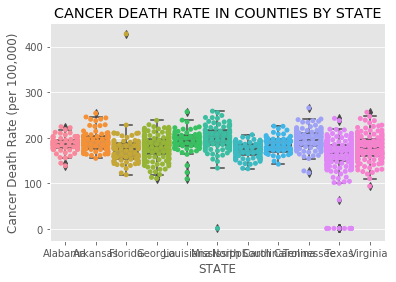

In [393]:
#Cancer death rate by state
#data = master.sort_values(by=['Deaths_AgeAdj_Rate'])
ax = sns.swarmplot(x= 'State', y = 'Deaths_AgeAdj_Rate', data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Deaths_AgeAdj_Rate"], ascending = False)))
ax = sns.boxplot(x= 'State', y = 'Deaths_AgeAdj_Rate', data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Deaths_AgeAdj_Rate"], ascending = False)))
ax.set(xlabel='STATE', ylabel='Cancer Death Rate (per 100,000)', title= 'CANCER DEATH RATE IN COUNTIES BY STATE')
plt.show()

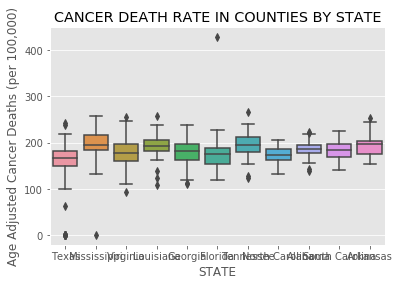

In [394]:
#Cancer death rate by state
#data = master.sort_values(by=['Deaths_AgeAdj_Rate'])
#ax = sns.barplot(x= 'State', y = 'Deaths_AgeAdj_Rate', data = master.sort_values(by=['Deaths_AgeAdj_Rate']))
ax = sns.boxplot(x= 'State', y = 'Deaths_AgeAdj_Rate', data = master.sort_values(by=['Deaths_AgeAdj_Rate']))
ax.set(xlabel='STATE', ylabel='Age Adjusted Cancer Deaths (per 100,000)', title= 'CANCER DEATH RATE IN COUNTIES BY STATE')
plt.show()

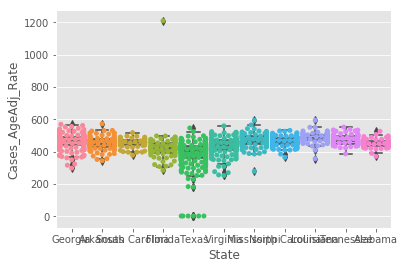

In [395]:
#Cancer newcases rate by state
ax = sns.swarmplot(x= 'State', y = 'Cases_AgeAdj_Rate', data = master)
ax = sns.boxplot(x= 'State', y = 'Cases_AgeAdj_Rate', data = master)
plt.show()

In [ ]:
ax = sns.scatterplot(x= 'County', y = 'Deaths_AgeAdj_Rate', data = master)
plt.show()

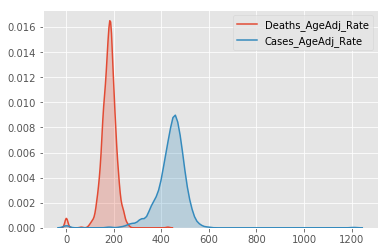

In [374]:
sns.kdeplot(master.Deaths_AgeAdj_Rate, shade=True)
sns.kdeplot(master.Cases_AgeAdj_Rate, shade=True);

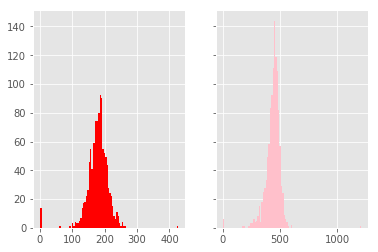

In [416]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False)
n_bins = 100
axs[0].hist(master.Deaths_AgeAdj_Rate, bins=n_bins, color = 'red')
axs[1].hist(master.Cases_AgeAdj_Rate, bins=n_bins, color= 'pink')
plt.show();

In [314]:
fips = master.FIPS
values = master.Teen_Birth_Rate
fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig, filename='choropleth')

/Users/user/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




The draw time for this plot will be slow for clients without much RAM.


/Users/user/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



## Segregating the determinants based on their category. Socio-eco and physical environment, clinical-care, health-behaviors and health-outcomes-indicators.

In [396]:
# Health behaviors and co-morbidity
X_health = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'MV_Mortality_Rate','pct_Food_Insecure',
       'Household_Income', 'pct_Homeowners','Income_Ratio','pct_below_18', 'pct_65_and_over', 'pct_African_American',
       'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic',
       'pct_Non_Hispanic_White', 'Years_of_Potential_Life_Lost_Rate','pct_Fair_Poor', 'Physically_Unhealthy_Days', 
        'pct_LBW','pct_Alcohol_Impaired', 'Mentally_Unhealthy_Days', 'pct_Uninsured', 'PCP_Rate',
       'Dentist_Rate', 'MHP_Rate', 'Preventable_Hosp._Rate','Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'Presence_of_violation','pct_Severe_Housing_Problems'], axis=1)

In [397]:
#Socio-economical and physical environment
X_SEP = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate', 'Drug_Overdose_Mortality_Rate', 
        'MV_Mortality_Rate', 'pct_Insufficient_Sleep', 'pct_below_18', 'pct_65_and_over', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic','pct_Non_Hispanic_White', 'Years_of_Potential_Life_Lost_Rate',
       'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers','pct_Obese', 'pct_Physically_Inactive', 
        'Mentally_Unhealthy_Days', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'pct_Limited_Access_to_healthy_foods',
        'Food_Environment_Index'], axis=1)

In [398]:
#Clinical Care
X_clinic = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 
        'pct_Limited_Access_to_healthy_foods','Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate', 
        'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners', 'pct_below_18', 'pct_65_and_over', 
        'pct_African_American', 'pct_American_Indian_Alaskan_Native', 'pct_Asian', 
        'pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
        'Years_of_Potential_Life_Lost_Rate','pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers',
       'pct_Obese', 'Food_Environment_Index', 'pct_Physically_Inactive','pct_With_Access', 'pct_Excessive_Drinking', 
        'pct_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'Mentally_Unhealthy_Days', 
       'Graduation_Rate', 'pct_Some_College','Income_Ratio','pct_Unemployed', 'pct_Children_in_Poverty', 
        'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 'Presence_of_violation',
       'pct_Severe_Housing_Problems'], axis=1)

In [399]:
# Health outcomes
X_outcomes = master.drop(['FIPS', 'State', 'County', 'Life_Expectancy', 'Child_Mortality_Rate',
        'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate','pct_Insufficient_Sleep', 'Household_Income', 
        'pct_Homeowners', 'pct_below_18', 'pct_65_and_over', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Smokers','Income_Ratio','pct_Obese', 'Food_Environment_Index', 
        'pct_Physically_Inactive', 'pct_With_Access', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'Presence_of_violation', 'pct_Severe_Housing_Problems'], axis=1)

### Looking over the correlation of variables in each category with cancer rate

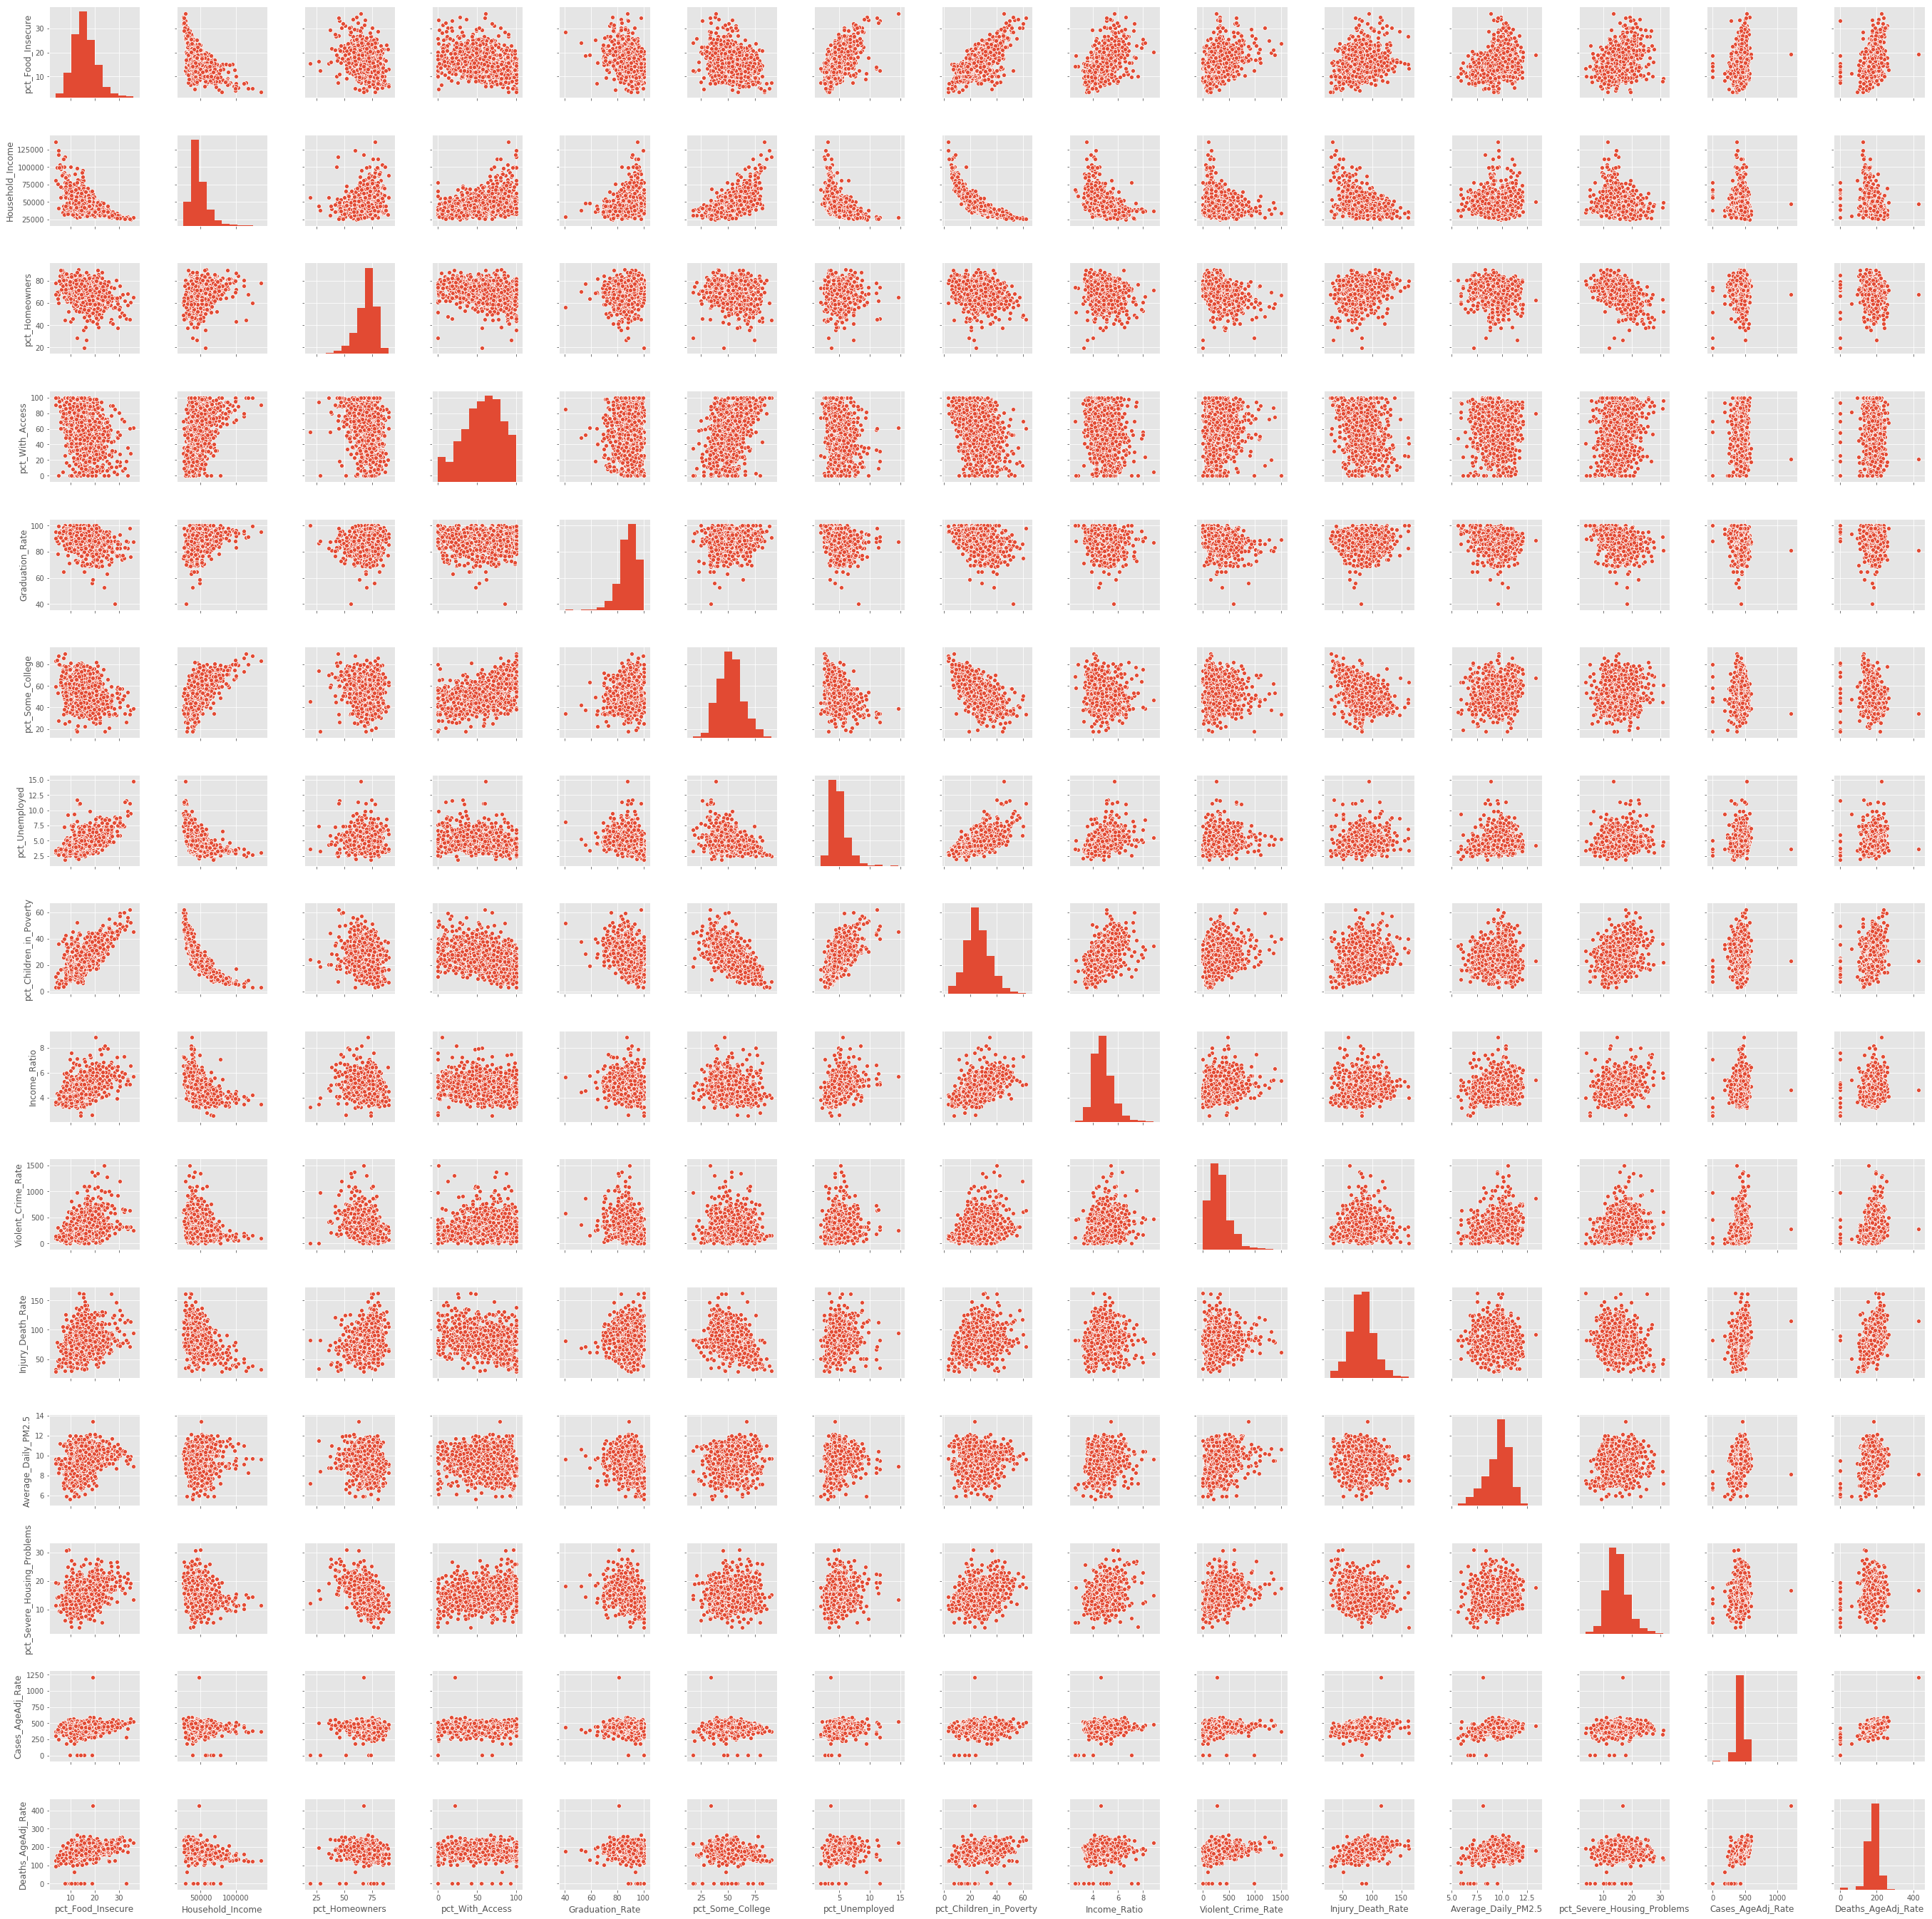

In [375]:
sns.pairplot(X_SEP)

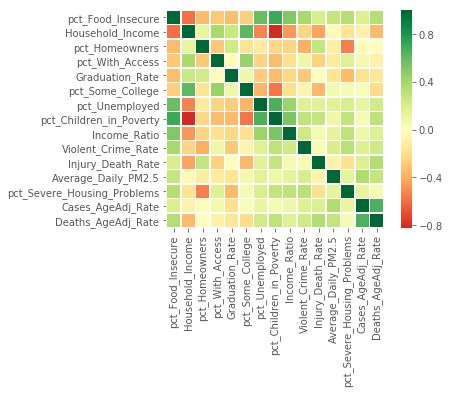

In [349]:
sns.heatmap(X_SEP.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

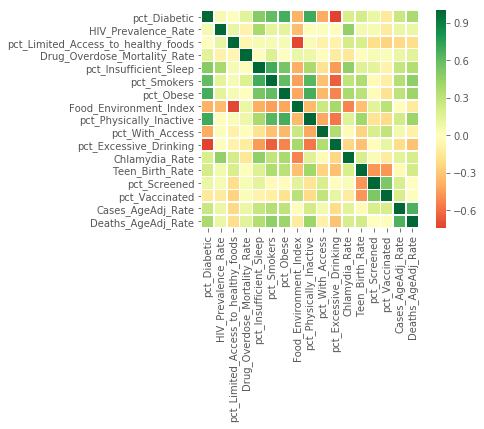

In [350]:
sns.heatmap(X_health.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

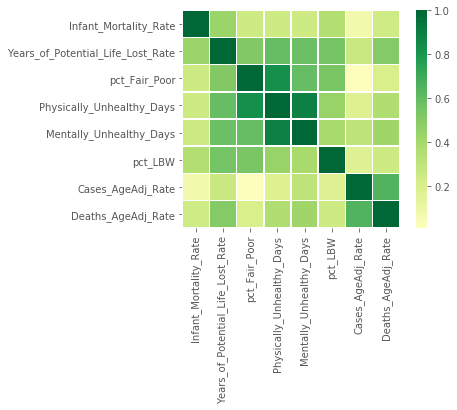

In [351]:
sns.heatmap(X_outcomes.corr(), square=True, cmap='RdYlGn', center=0,linewidths=.5);

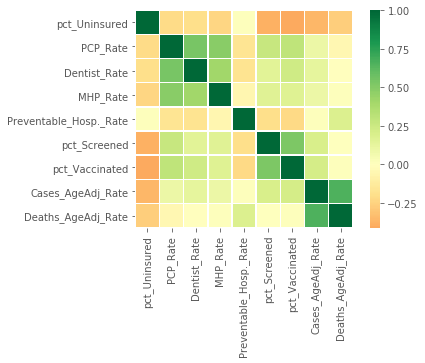

In [352]:
sns.heatmap(X_clinic.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5);

# Modeling : 
## - Which feature can define county-wise disparity in cancer rate?
## - Can we predict the cancer rate by this feature(s)?
## - Finding the feature(s) to detect above/below base-line of cancer death rate.
## - Can we set up an actionable target of those features to those counties which have above base-line cancer death rate considering 10% decrease in the cancer death rate as a target?

In [376]:
#Creating the target variable DataFrame where y_BBL is a labelled target variable.
y_death = pd.DataFrame(master.Deaths_AgeAdj_Rate)
y_case = pd.DataFrame(master.Cases_AgeAdj_Rate)
y_BBL = pd.DataFrame(master.BBL)

AttributeError: 'DataFrame' object has no attribute 'BBL'

In [247]:
print(y_death.columns)
print(y_case.columns)
print(y_BBL.columns)
print(y_death.info())
print(y_case.info())
print(y_BBL.info())

Index(['Deaths_AgeAdj_Rate'], dtype='object')
Index(['Cases_AgeAdj_Rate'], dtype='object')
Index(['BBL'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 1 columns):
Deaths_AgeAdj_Rate    1142 non-null float64
dtypes: float64(1)
memory usage: 9.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 1 columns):
Cases_AgeAdj_Rate    1142 non-null float64
dtypes: float64(1)
memory usage: 9.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 1 columns):
BBL    1142 non-null int64
dtypes: int64(1)
memory usage: 9.0 KB
None


In [187]:
#master.info()

In [31]:
master.BBL.value_counts(normalize=True)

No     0.768827
Yes    0.231173
Name: BBL, dtype: float64

In [181]:
X = master.drop(['FIPS', 'State', 'County','Cases_AgeAdj_Rate','Deaths_AgeAdj_Rate', 'Presence_of_violation', 'BBL', 'Presence_of_violation'], axis =1)
#X = master.Injury_Death_Rate.values
y = master.BBL

In [182]:
#X.info()

#### Another thing to look at is high cardinality features. If we have more than 100 categories for each of these features, it won’t be very useful to use them. It would add dimensions to our dataset and we don’t want to do that.

In [183]:
max_cardinality = 100
high_cardinality = [col for col in X.select_dtypes(exclude=np.number)
                   if X[col].nunique() > max_cardinality]
X = X.drop(columns=high_cardinality)
#X.info()

### So, we did not have and dropped any features with high cardinality. All the features are float or int64. The int and float objects can just be used as is.

Logistic Regression
Logistic Regression is great for multiclass classification because Scikit-learn encodes encodes the target labels automatically if they are strings.

First, we need to split our data into train and test.

In [184]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#X = X.drop(columns='id') #id is our index and won't help our model
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

When you’re working with a learning model, it is important to scale the features to a range which is centered around zero. Scaling will make sure the variance of the features are in the same range.

In [185]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#X = X.drop(columns='id') #id is our index and won't help our model
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

Now, we’ll run the model on both train and test and see what our accuracy score is.

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

Train accuracy score: 0.8726635514018691
Test accuracy score: 0.8741258741258742


In [264]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
logreg = LinearRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Train accuracy score:',accuracy_score(y_test,y_pred))
print('Test accuracy score:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.01592583e-02 -6.98552219e-01 -2.34688340e-01  8.91391173e-01
  4.25864310e-01 -6.85190125e-02  1.06683141e+00 -3.11789786e-01
  2.55632175e-01 -1.06685265e+00 -3.69955420e-01 -6.69189094e-01
  6.53974645e-01 -1.94713875e+00 -9.21984016e-01 -5.01038253e-01
 -8.29508667e-01  4.45501682e-01 -1.38193407e+00 -1.18221358e-01
 -2.05758748e-01  1.56552746e-01 -7.46723861e-01 -1.12697911e+00
 -1.31735180e+00  7.37382901e-01  2.09623365e-01  2.95155675e-01
 -9.54267068e-01  1.16466215e+00 -5.35029780e-01 -9.12780027e-01
 -3.25966748e-02 -2.41718062e+00 -1.47633603e-15  4.22469367e-01
 -4.89568350e-01 -2.16450411e-01 -4.19796119e-01 -2.88879593e-02
  7.34078019e-01 -3.25964851e-01 -2.35094364e-02  1.40734547e-01
  1.87270311e-01  6.36581256e-01  8.92339952e-02 -7.91982477e-01
  6.81025311e-01  1.43062225e+00  2.11286674e+00  1.04241884e+00
  1.50460887e+00 -7.05016411e-01 -7.50890023e-01 -6.26390630e-01
 -5.16649644e-01 -2.06984445e-01  4.30400582e-01 -4.20637929e-01
  7.52736985e-01 -1.51027048e-01  1.70752329e+00 -1.64025132e+00
  1.47530161e+00 -5.03871676e-01  1.26502891e+00  8.41532184e-02
  9.21681813e-01 -7.88935025e-01 -3.01136169e-01  1.25512140e-01
 -1.10806300e-01  2.16757855e-03 -6.51749090e-01  3.39761011e-01
  2.14024069e+00 -1.88064463e-01  1.41455507e+00  2.00882463e-01
  1.06630623e+00 -8.08428958e-02  5.38314268e-01  6.96984334e-01
  1.02375971e-01 -1.32337473e+00 -1.01234754e+00  3.12251521e-01
 -1.44962563e-01 -4.72440312e-01 -2.27630027e-01  3.44009340e-01
 -4.13100796e-01  3.05265172e-01 -8.07638142e-01 -1.47633603e-15
 -1.00432215e+00 -2.72250296e-02 -5.89162439e-01 -3.52323602e-01
  9.30684526e-02  2.09574171e+00  2.30522702e-01  2.14477419e+00
  1.02529739e+00  2.02646458e+00 -1.47633603e-15 -6.95175582e-01
  9.02969616e-01 -1.59276566e+00 -2.39225583e-01  2.23797331e-01
 -3.11138436e-01 -1.38330101e+00  1.66609427e-01 -1.25074405e+00
  4.90172168e-01  1.12721106e+00  2.12862889e-01 -2.51412492e-01
 -9.20509179e-01 -5.58746824e-01 -5.86317016e-01  7.08028972e-01
 -3.42872458e-01 -1.67344406e+00  2.33303413e-01  1.59053604e-01
 -6.86777990e-01  2.12228021e+00 -3.51320648e-01  6.33085744e-01
  8.66871146e-01 -1.37077595e+00  8.01227622e-01  4.93168742e-02
  5.27210804e-01 -1.07297470e+00 -1.33240679e+00 -8.24871424e-01
  3.11953979e-01  2.07282878e-01  1.46077173e+00  3.50764371e-01
 -4.04313986e-01  8.43055873e-02 -2.17415402e+00  7.94504913e-01
  2.51537890e-01  1.45031374e+00 -1.00337369e+00  1.54161930e-01
  4.63176636e-01 -1.63251392e+00  1.22828700e+00  1.62236806e+00
 -1.27980465e+00 -1.06933784e+00 -4.39756013e-01  6.40884199e-01
  1.05381867e+00 -1.25114055e+00  1.75360619e+00  5.88872392e-02
 -3.02767929e-01  5.72406689e-01  1.90795993e+00 -1.75167308e+00
 -8.76846549e-01 -6.49542740e-01  4.16147952e-01  2.42623572e+00
 -1.17778790e-02 -3.53469639e-01 -1.47633603e-15 -2.98504805e-01
  3.83001200e-01  3.72409187e-01  1.63682169e-01  1.64764312e-01
  2.25629532e-01  2.53910071e+00 -1.69629611e-02 -2.35934597e+00
 -5.72205237e-01  9.89135177e-02 -4.06874376e-02 -2.70618446e+00
  3.94191029e+00 -1.47633603e-15  1.90882651e+00  1.01807905e-01
 -5.64987586e-01 -1.05964686e+00  1.26893689e+00 -2.70916039e-01
 -2.08924803e+00  2.11096506e+00 -8.27520786e-01  3.63474770e-01
 -1.66957445e+00  1.38477106e+00  2.27033879e-01 -6.69289351e-01
 -6.65051505e-02  2.25773437e-01  1.56578007e+00  1.67520034e+00
  1.71807235e+00  6.17222917e-01  1.08475671e+00  1.36181708e+00
 -5.24977853e-04  1.90896582e+00  2.36224862e-01 -1.14280348e+00
  5.53228377e-01 -1.60926823e+00  7.03355081e-01 -1.07659291e+00
 -2.25749999e+00 -2.15921954e+00 -2.21011041e+00 -5.91210008e-01
 -1.04079789e+00 -1.10424157e+00 -1.72625329e-01  1.03264728e+00
  2.36957830e+00 -1.26773199e+00  6.35414177e-01 -7.34213337e-01
 -1.36797946e-01 -1.21598331e+00 -6.41583140e-01 -1.00133078e+00
  9.70799067e-01 -7.67877730e-02  2.02216223e-01  1.98495545e-01
 -1.51907708e-01  3.23047383e-01 -1.16557187e+00  3.86837587e-01
 -9.44799125e-01 -5.52249987e-01  1.86344535e+00 -6.01358110e-01
 -4.34150179e-01 -1.07099300e-01 -4.63929555e-02  4.16091876e-01
  4.38388188e-01  2.64353997e-01 -8.44594276e-01  2.03630110e+00
  3.91002127e-01  1.24271150e+00 -1.14686124e+00  1.06475929e+00
  6.48779330e-01 -1.96400771e+00 -1.45755852e+00  2.95705694e-01
  5.69332635e-01  1.03030033e+00 -3.97051289e-01  2.79887544e-01
  2.13986662e-01 -3.41377697e-01  2.01238205e+00  1.55504740e+00
  3.49184214e-01 -2.96800570e-03  3.55716766e-02  7.95050437e-01
 -2.02181852e-01  1.15026660e+00 -1.11313697e-01 -9.89417948e-01
  2.79035701e-01  9.50475592e-01 -1.23635330e+00  2.28619386e+00
 -1.47633603e-15 -7.98191107e-01 -1.15889889e+00 -5.05223810e-01
 -1.91494445e+00 -1.47633603e-15 -4.21886445e-01  1.81211420e-01
 -8.17917658e-01 -7.94196874e-01 -3.66478543e-01 -1.53362730e+00
  3.39484226e-01  1.04444661e+00 -4.49872551e-01 -2.62159391e+00
 -5.70945222e-01 -1.80191813e-01  2.82210496e-01  1.64972852e+00
 -2.62763981e-02  6.20817352e-02 -1.04399350e+00 -4.37921974e-01
 -3.39141977e-02 -4.58324665e-01 -8.74154852e-01  5.29981620e-01
 -1.62643681e-01  3.83477836e-01  8.76115138e-01  7.37850397e-01
 -1.90976325e+00 -1.51550760e+00  6.10676308e-01 -7.25383644e-01
 -1.24234017e-01  2.44346783e-01  9.32990158e-02  1.45355676e-01
  1.73408786e-01  9.67374653e-01 -8.94062873e-01  2.25423521e-01
 -1.36757933e+00  6.27344966e-01 -3.62148710e-01  9.92138231e-01
 -3.81464331e-01  7.96697651e-01 -1.90079781e+00 -4.14943876e-02
  1.29537920e+00  7.64314434e-01 -6.89792890e-01 -5.01689171e-01
  3.22640721e+00  2.08447953e+00  7.20242232e-01 -6.06430998e-01
 -1.26711827e+00  3.64651264e-01 -8.41394942e-01  3.68876549e-01
  4.86546802e-01 -1.56526795e+00 -4.74854972e-01  2.69223632e+00
  1.13949285e+00 -4.83628489e-01 -6.14948643e-01  8.23715363e-01
  4.46766874e-01 -8.56776899e-02  1.70732755e+00 -2.94875343e-01
 -3.00027272e-01 -1.46173023e+00  1.77427442e-01  8.22285703e-01
  6.71442014e-02  4.56552748e-01  1.06339315e+00 -3.33030057e-01
  1.79615006e+00  2.22987993e-01 -4.60506890e-01 -8.70253994e-01
 -2.95150787e-01 -6.51375026e-02  1.20124141e+00  5.51739535e-01
  4.61800389e-01 -1.34599447e+00 -2.55527407e+00 -1.37338720e+00
  1.30810587e+00  7.97735958e-01 -9.37939006e-02  1.10929007e+00
 -8.69928205e-01  1.61586754e+00  6.60626306e-01  2.97298848e+00
  1.11694638e-01 -8.66967860e-01 -3.86406078e-01 -1.45554843e+00
  1.59805474e+00  1.98747993e-01 -7.54859076e-02  1.81509012e+00
  4.04454256e-01 -5.27418855e-01 -2.98313721e-01  2.21345293e-01
  3.21012921e-01  2.29033427e+00 -5.09639075e-01  4.36968047e-01
  9.14720119e-02  8.67833146e-02  1.82177475e-02 -1.43335515e-01
  5.20269148e-01  8.46722905e-01  5.96687831e-02  8.74196044e-01
 -1.62676326e+00 -2.06183714e+00  5.41246203e-03 -5.06512253e-01
  4.16344595e-01  2.05278161e-01 -4.24642488e-01 -6.44228604e-01
  3.16628147e-01 -1.47633603e-15  6.72051809e-01 -9.64013250e-02
 -9.44803668e-01 -6.81872490e-01 -6.54010425e-03 -1.14934572e+00
 -5.38327908e-01 -3.76728047e-01  1.58217388e+00  9.38314260e-01
  8.01529145e-01  1.34269676e+00  1.66298560e+00  1.07444850e+00
 -4.55391491e-01  9.81904403e-02 -1.87907602e-01  5.95626572e-01
  2.53965519e-01  9.51176978e-01 -6.45170705e-01  8.57537809e-01
  1.90159201e+00  1.06182709e+00  1.91135944e-01 -3.01370904e-01
 -4.14971057e-01  7.37953209e-01 -8.26108902e-01  1.88206702e+00
  7.97198584e-01 -8.81515700e-01 -2.55156595e+00 -6.43160994e-01
  1.44044850e+00  2.38783919e+00 -1.31826842e+00 -8.14943701e-01
  1.47425249e+00 -2.93349966e-01  4.80396331e-02 -2.38102537e+00
 -9.62056978e-01  2.64833520e+00  8.70203534e-01 -2.16078247e-02
 -6.79591282e-01  1.05868653e+00  7.41259240e-01 -2.43078194e-02
  1.19560352e+00 -6.08642615e-01 -1.36747385e+00 -4.43568230e-01
 -5.91262068e-01 -7.00417426e-01  3.63639292e-01 -1.06285128e+00
  1.09847936e+00 -1.40938306e-01 -9.36114958e-01  6.91866064e-01
  1.02342101e+00  8.35627552e-01 -1.67416501e+00  2.78469392e-01
  7.82100433e-01  6.41874297e-01  1.13729351e-01 -4.50630788e-01
 -1.37442877e+00  1.27892188e+00 -7.07136437e-01 -2.33601016e-01
 -6.34739177e-01 -5.36662486e-01 -1.90953558e+00  6.75398281e-01
  1.79286820e+00  1.04384931e-01  3.05126524e-01 -8.94530529e-01
  3.09210826e-01 -1.14689734e+00 -1.22358068e+00 -1.17952961e-01
  4.19476618e-01  5.26199044e-01  1.14535179e+00 -1.25036911e+00
  4.54321831e-01  1.42644876e+00 -2.95579594e-01  3.38309175e-01
 -6.24726881e-02 -8.32830053e-01 -3.03297792e-01  1.18139490e+00
 -6.44173991e-01  1.80401140e+00  1.34806388e-01 -5.43251931e-01
  5.56083367e-01  7.64077018e-01  3.77250501e-01 -6.95617929e-01
 -5.50309763e-01 -2.51209089e-01  1.60039297e+00 -1.41813243e+00
 -1.89791340e-01  1.32450970e+00  1.97851936e-01 -4.99064976e-01
 -7.42288805e-01  4.09887504e-01 -1.44808409e+00 -1.46923482e+00
  4.13461322e-01 -1.19892134e+00 -7.78353071e-01  2.21979649e+00
  5.26757583e-01 -2.80638895e-01 -5.95249571e-01  9.03326092e-02
 -4.27381544e-01 -3.24545464e-01 -1.96226028e+00 -3.38856731e-01
  3.33374315e-01 -4.41442639e-01 -1.09901577e+00 -1.18080412e-01
 -2.07737010e-01  4.67122963e-01 -1.63105257e+00 -1.15608873e+00
 -9.90255294e-03  2.53510540e-01 -3.01645613e-01  1.66013226e+00
  1.82507448e-01  6.40750805e-02 -4.68575548e-01 -1.01785639e+00
 -5.14681690e-01 -2.06729686e+00 -5.11063737e-01 -1.32881864e+00
 -5.27733600e-01  9.58424074e-01  2.29712980e+00 -1.44750734e+00
  1.95192646e+00  8.53506834e-01  1.12283210e+00  1.25764557e-02
 -7.93132820e-01  3.89411941e-01 -9.70313127e-01  1.09546616e+00
 -6.14663489e-03  1.95716905e-01  5.95363664e-01  7.25942761e-01
 -9.83243627e-02 -1.50331564e+00 -8.35844915e-01  4.98254719e-01
  1.03193301e+00  1.31939746e+00  2.00803798e-01 -1.91694067e-01
 -1.47633603e-15  5.37435615e-01 -8.90189939e-02  3.42149410e-01
  1.26540719e+00 -1.28383932e+00  4.49334933e-01 -1.46252807e-01
 -2.30253425e-01  1.18462794e-01  8.89303828e-01 -5.59828916e-01
 -4.73931199e-03 -7.77224382e-01  1.81601673e+00  6.02757897e-01
 -6.94578162e-01  6.03427717e-01 -4.76721154e-01 -7.18486746e-02
  3.29746592e-01  3.44203448e-01 -9.14295824e-01  1.84283442e-01
  5.73834475e-01 -4.32496441e-01  5.51720489e-01  3.29023409e-01
 -2.05465126e-02 -5.56974621e-01  4.05510103e-01 -5.45583063e-01
 -1.32167593e+00  7.61672236e-01  1.29011204e-01  9.59396261e-02
 -2.04017277e+00  2.23609228e-01 -1.60573972e-01  2.59510649e+00
  3.62687991e-01 -7.83906568e-01 -1.03622567e+00  1.34720546e-01
  1.07511126e+00 -5.39868502e-01  1.02514333e+00 -1.03525081e-01
  1.11448791e+00  1.19288616e+00 -1.11897528e-01  1.14524922e+00
 -5.85436667e-01  2.65159343e-01 -1.13966917e+00 -8.61325657e-01
 -4.89170087e-01  1.61264063e+00  1.46728216e+00  7.65187600e-01
 -5.72557123e-01 -1.68000993e-01  2.47726495e-01 -3.37784800e-02
  1.16100289e+00  1.47522283e+00  2.25350065e+00  1.09572908e+00
 -9.69406659e-02  8.95383100e-01 -5.74797840e-01  3.00615719e-01
  4.13296776e-01 -2.81195323e-01 -1.51404423e+00  3.00170797e-01
 -3.05790549e-01 -1.20207655e+00  7.45796283e-01  1.58728287e-01
 -2.68429121e-01 -2.75490970e-01  7.23675368e-01 -5.58820108e-01
 -2.63311094e+00 -4.36824689e-01 -2.75035751e-02  2.25999190e-01
  4.97406658e-01 -1.11895752e+00 -2.76134512e-01  7.20781430e-01
  6.67497483e-02 -4.33135180e-01 -4.35404041e-02 -1.48035380e+00
 -8.22112316e-01  8.65881375e-01  5.16815680e-01  1.94279441e+00
 -3.07322153e-01  1.68008360e+00 -5.99496712e-01 -3.56098661e-01
 -1.47579781e+00  7.32685312e-01  2.49839182e-01 -3.39302880e-01
  9.74007427e-02 -9.30727164e-01 -6.58341786e-01 -6.77197882e-01
 -1.23725656e+00 -2.44418090e-01 -1.98774027e+00 -1.28107538e+00
  9.88148066e-01  7.83793085e-01 -5.41641734e-01  1.13055122e+00
 -1.47633603e-15 -3.00784656e-02 -1.46336419e+00 -5.28724062e-01
  2.17045849e+00 -2.10742013e-01 -1.31986661e+00  6.34140694e-01
  5.02529667e-01 -1.33954127e+00  1.22962692e+00 -1.54697182e+00
 -9.93561347e-02 -7.78353071e-01  6.08876522e-01  1.02648636e+00
 -7.99184849e-01 -1.59785137e+00  7.15225454e-01  1.01602384e+00
 -5.22467095e-01 -2.74500010e-01  4.65684980e-01  6.92316626e-02
 -6.24519332e-01  1.01919513e+00 -1.47633603e-15  5.51317383e-01
 -1.62988044e+00  3.85553258e-01  4.65371914e-01 -1.10858851e+00
 -1.00253005e+00 -6.42847320e-01 -1.47633603e-15  3.95862435e+00
 -3.59047310e-02  7.06333420e-01 -1.10760535e+00 -5.86630717e-01
 -3.71625873e-01 -2.14575063e-01 -1.77699687e-01  3.04568840e-01
  2.42980130e+00  4.39451893e-01 -1.47633603e-15 -8.91550359e-01
  2.35557444e+00  3.90305306e-01 -1.14325798e+00  4.66965234e-01
  2.04505002e-01 -1.14097710e+00 -1.45257401e+00  3.52589917e-01
  1.82498148e+00 -1.04103476e+00  4.01659146e-01 -2.12792746e+00
 -1.29246482e+00 -8.18072726e-01 -1.56892839e-01 -9.25333594e-01
  4.78505624e-01  2.09028535e-01 -3.19554040e-01 -5.30658713e-01
 -1.35659033e-01 -7.34550510e-01  1.87831267e-01 -1.27473797e-01
  2.10887280e-01 -6.25186882e-01 -3.35220306e-01  6.30928865e-01
  3.34024909e-01  5.54840577e-01 -4.30177195e-01  8.25423414e-01
 -4.77381421e-02  9.77277340e-01 -1.45499552e+00  3.20992431e-01
  2.75311957e+00  6.15633397e-01  1.34427369e+00  6.86739402e-01
  1.35224983e+00  5.83136070e-01  4.32286380e-01 -2.24810998e+00
 -6.55571116e-01 -1.18674737e+00  5.39232963e-01 -1.58687211e+00
  5.97993057e-01 -5.19741747e-01 -6.11979271e-01 -1.69016014e+00
 -8.45833716e-01  3.24574989e+00  6.86787272e-01  7.32408559e-02
  8.55321923e-02 -1.08130670e+00  2.35902435e-01 -1.47633603e-15
 -2.74902795e-03 -1.90857429e+00 -5.49855464e-01 -2.75419828e-01
  1.06521592e-01 -1.92381213e+00 -1.47633603e-15 -3.83786188e-02
 -7.62436746e-01 -7.82133870e-01  2.11823061e+00 -9.38701094e-01
 -7.25189506e-02 -2.02073017e-01 -8.15878684e-01  1.83368975e-01
  1.04774224e-01 -4.72292288e-01  1.93951629e-01 -1.07662330e+00
 -1.47633603e-15  3.90493210e-01 -1.02449416e-01 -8.28756388e-01
  6.37310598e-01 -3.49670809e-01 -9.86250793e-01  1.03522345e+00
 -4.13187129e-01  7.16465621e-01  9.30932375e-01 -3.22129375e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'Series' object has no attribute 'info'

SVM: 0.651025 (0.072141)


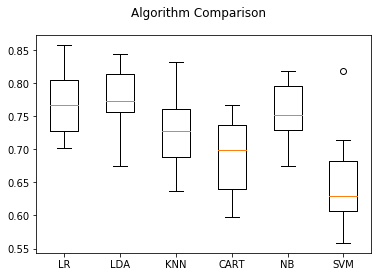

In [65]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [-15.18953864  -1.14555077   0.93243816  -0.26238568  -1.95525775
   0.05470584  -5.10261429   0.16072021  -1.25826154  -0.32485929
  -1.54085551   3.61457157  -1.45513356  -7.80460684 -29.40146846
  -5.46698437  -2.9891692   -0.49932102 -35.21000771 -35.85607755
  -3.50792674  -7.62039479   2.71101345  -5.06242743   0.22073167
   2.3841733   -1.53817387   1.0542192    3.78806523  -0.45997189
   0.73958978   2.23995251   3.63662402  -1.22182348   0.69509631
   3.15756114  -1.24054308  -1.20142741  -1.35466818   2.49274926
   0.195881    -3.40975693   1.93403323   6.98776043  -0.37868593
   3.42974162  -1.42368809   1.63307827]
Mean squared error: 844.12
Variance score: 0.45


In [403]:
master.BBL.value_counts()

0    878
1    264
Name: BBL, dtype: int64

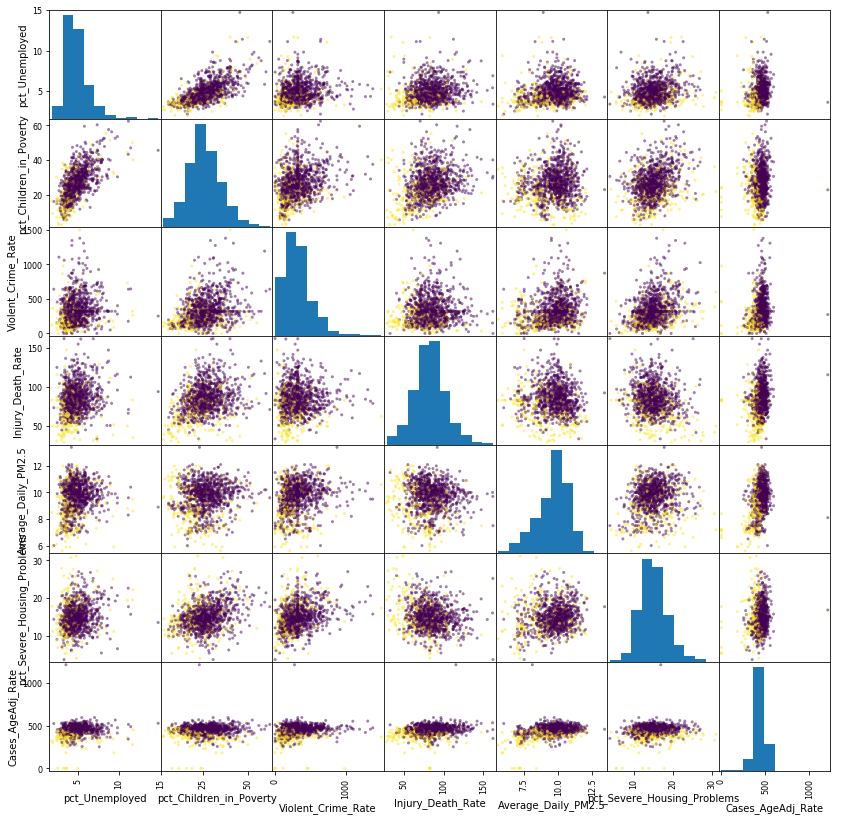

In [36]:
c = master.BBL
_=pd.plotting.scatter_matrix(master.iloc[:, 45:53], c = c, figsize= [14,14])

In [140]:
death_usa = pd.read_csv('./data/background_analysis/All USA cancer death rate 2011-2015.csv')
case_usa = pd.read_csv('./data/background_analysis/All USA new cases rate 2011-2015.csv')

In [141]:
death_usa = death_usa.drop(['CancerType', 'Year', 'Sex', 'DeathCount','Population'], axis=1)
case_usa = case_usa.drop(['CancerType', 'Year', 'Sex', 'CaseCount','Population'], axis=1)

In [142]:
death_usa = death_usa.rename(index = str, columns = {'Area' : 'State', 'AgeAdjustedRate' : 'Death_Rate'}) 
case_usa = case_usa.rename(index = str, columns = {'Area' : 'State', 'AgeAdjustedRate' : 'Newcase_Rate'})

In [143]:
death_usa.head()

,State,Death_Rate
0,Utah,127.2
1,Hawaii,136.1
2,Arizona,145.2
3,California,147.5
4,Colorado,139.6


In [144]:
death_usa.shape

(51, 2)

In [147]:
case_usa.head()

,State,Newcase_Rate
0,New Mexico,375.5
1,Arizona,388.5
2,Colorado,404.7
3,Nevada,391.7
4,Utah,407.3


In [148]:
allUSA = pd.merge(death_usa, case_usa, on = 'State')

In [149]:
allUSA.head()

,State,Death_Rate,Newcase_Rate
0,Utah,127.2,407.3
1,Hawaii,136.1,415.7
2,Arizona,145.2,388.5
3,California,147.5,411.2
4,Colorado,139.6,404.7


In [150]:
allUSA.describe()

,Death_Rate,Newcase_Rate
count,51.000000,51.000000
mean,165.703922,452.419608
std,15.219947,30.821064
min,127.200000,375.500000
25%,155.850000,436.950000
50%,165.200000,457.800000
75%,175.450000,468.950000
max,199.300000,520.300000


All Types of Cancer, All Ages, All Races/Ethnicities, Male and Female, Rate per 100,000 people in year 2015

Text(0.5, 1.0, 'Cancer Death Rate Per 100,000 in 2011-2015')

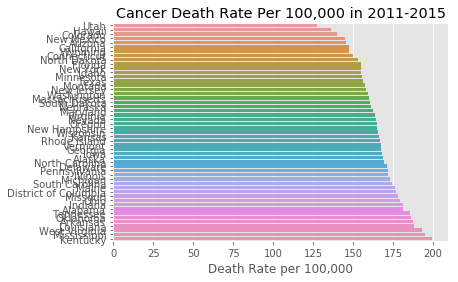

In [152]:
allUSA.sort_values(['Death_Rate'], inplace=True)
mean = allUSA.Death_Rate.mean()
ax = sns.barplot(x= 'Death_Rate', y='State', data= allUSA)
ax.set_xlabel('Death Rate per 100,000')
ax.set_ylabel('')
ax.set_title('Cancer Death Rate Per 100,000 in 2011-2015')

Text(0.5, 1.0, 'Cancer New Cases Rate Per 100,000 in 2011-2015')

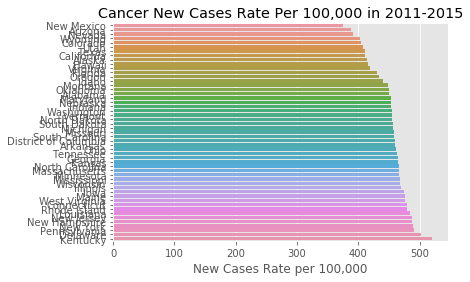

In [151]:
allUSA.sort_values(['Newcase_Rate'], inplace=True)
ax = sns.barplot(x= 'Newcase_Rate',  y='State', data= allUSA)
ax.set_xlabel('New Cases Rate per 100,000')
ax.set_ylabel('')
ax.set_title('Cancer New Cases Rate Per 100,000 in 2011-2015')